In [1]:
import pandas as pd
import numpy as np

#Preprocess data
data = pd.read_csv('rf_NN.csv')

In [2]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import sklearn.model_selection as ms
import pandas as pd
#from helpers import  basicResults,makeTimingCurve,iterationLC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [3]:
X = data.drop('data.default.payment.next.month',axis=1)
y = data['data.default.payment.next.month']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)


In [5]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [6]:
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 15 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 15))


In [7]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

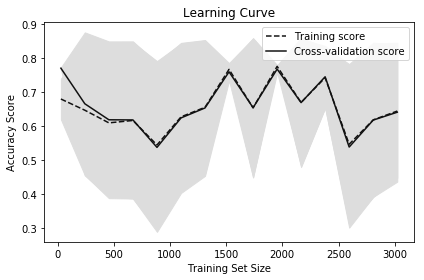

In [8]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [9]:
#best training size is 11000 rows, about 80% 
X_train, X_test2, y_train, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state = 2)


In [10]:
#hyperparameters
mlp = MLPClassifier()

#Define a hyper-parameter space to search. (All the values that you want to try out.)
parameter_space = {
    'hidden_layer_sizes': [(1,),(3,),(5,),(10,),(50,),(100,),(100,10,),(2,2,),(100,100,),(100,10,10,10,),(100,10,10,),(100,100,100,10,)]}

#Run the search
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, scoring='accuracy')
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)


Best parameters found:
 {'hidden_layer_sizes': (5,)}


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


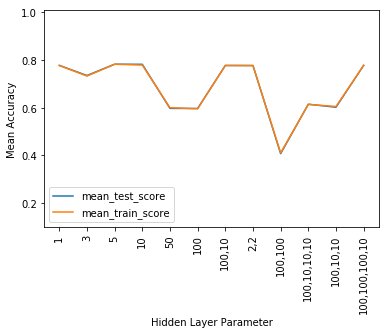

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(clf.cv_results_['mean_test_score'])
plt.plot(clf.cv_results_['mean_train_score'])
plt.ylim(0.1,1.01)
plt.xticks([0,1, 2, 3,4,5,6,7,8,9,10,11], ['1','3','5','10','50','100','100,10','2,2','100,100','100,10,10,10','100,10,10','100,100,100,10'], rotation='vertical')
plt.ylabel('Mean Accuracy')
plt.xlabel('Hidden Layer Parameter')

plt.legend(['mean_test_score', 'mean_train_score'], loc='lower left')

plt.show()

In [12]:
#train model based on parameters above
mlp = MLPClassifier(hidden_layer_sizes=(100, 10))
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
predictions = mlp.predict(X_test2)

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(confusion_matrix(y_test2,predictions))

accuracy_score(y_test2, predictions)

[[487  17]
 [143  25]]


0.7619047619047619

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(predictions, y_test2)

0.6841269841269842

In [15]:
#validation set
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test, predictions))

roc_auc_score(predictions, y_test)

[[638  22]
 [160  20]]
0.7833333333333333


0.637844611528822